# An intro to Python in Jupyter

First, start by creating a "Notebook." The notebook is a great format because you can run code cell by cell and add "Markdown" cells to annotate your code. Currently, I am writing in a Markdown cell. If you look at the toolbar at the top of your notebook, you will see a number of icons: a disk icon to save, a "+" to add a cell, scissors to cut, a double rectangle icon to copy, a clipboard to paste, a "play" icon to run a selected cell, a square to interrupt the kernel, a circle arrow to restart the kernel, a fast forward icon to restart kernel and run all cells, and finally a dropdown menu. The icons we are most interested in are the "+" and the dropdown menu.

When you want to add a new cell, press the "+" at the top. The cell will default to a code cell. If you want to change to a markdown cell, click the drop down menu and select "Markdown."

Whether you have a code cell or a Markdown cell, after you have populated the cell with whatever you want, you can "run" the cell by pressing Shift + Return on your keyboard.

## Intro to Markdown Cells

Markdown cells are great to write some notes about your code and explain what you're doing. Markdown also allows for formatting. You can look up how to use Markdown through a number of online resources like [this one](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). Here are some formats you might use in Markdown

````markdown
# This is a level 1 heading

## This is a level 2 heading

This is some plain text that forms a paragraph. Add emphasis via **bold** and __bold__, or *italic* and _italic_. 

Paragraphs must be separated by an empty line. 

* Sometimes we want to include lists. 
* Which can be bulleted using asterisks. 

1. Lists can also be numbered. 
2. If we want an ordered list.

[It is possible to include hyperlinks](https://www.example.com)

Inline code uses single backticks: `foo()`, and code blocks use triple backticks: 

```
bar()
```

And finally, adding images is easy: ![Alt text](https://www.example.com/image.jpg)
````

Try copying that into a Markdown cell and seeing what it looks like!

# Importing Python Packages

At the beginning on any code in Python, you have to import the software packages you require. In the code cell below, I import some of the main packages I use. 

## Using packages

A package is basically just a bunch of code. Each package has functions inherent to it that you can call. So let's say you want to call a numpy function that creates an array of numbers from 0 to 20 counting by 2. You can write `np.arange(0,20,2)`, which returns `array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])`. The more you code in Python, the more familiar you will become with certain packages and their functions. When you're just starting out, it is super valid to Google things. 

In [1]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Science packages
import PyCO2SYS as pyco2
import gsw

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

# Plotting packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

# Opening up a data file

Let's start by opening up a data file. I have saved some SAMICO2 data as a CSV. I will use the pandas package (as `pd`) to read the csv. Specifically I will use the `read_csv` function, which takes this form:

```python
df = pd.read_csv(file_path: str)

```

In [78]:
df = pd.read_csv('/Users/akbaskind/Desktop/Dissertation/SAMICO2_245.csv')
df

,Unnamed: 0,Day Number,DateTime,CO2 [ppm],Temperature [°C]
0,0,317.9412,2023-11-12 22:35:00,542.6,11.37
1,1,317.9620,2023-11-12 23:05:00,560.6,11.33
2,2,317.9829,2023-11-12 23:35:00,567.3,11.34
3,3,318.0037,2023-11-13 00:05:00,571.4,11.33
4,4,318.0245,2023-11-13 00:35:00,577.6,11.31
...,...,...,...,...,...
9679,9679,155.7745,2024-06-03 18:35:00,523.8,21.87
9680,9680,155.7954,2024-06-03 19:05:00,526.0,22.16
9681,9681,155.8162,2024-06-03 19:35:00,525.0,22.01
9682,9682,155.8370,2024-06-03 20:05:00,519.3,21.44


I don't like this useless column "Unnamed: 0" so I am going to drop it.

In [79]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Day Number,DateTime,CO2 [ppm],Temperature [°C]
0,317.9412,2023-11-12 22:35:00,542.6,11.37
1,317.9620,2023-11-12 23:05:00,560.6,11.33
2,317.9829,2023-11-12 23:35:00,567.3,11.34
3,318.0037,2023-11-13 00:05:00,571.4,11.33
4,318.0245,2023-11-13 00:35:00,577.6,11.31
...,...,...,...,...
9679,155.7745,2024-06-03 18:35:00,523.8,21.87
9680,155.7954,2024-06-03 19:05:00,526.0,22.16
9681,155.8162,2024-06-03 19:35:00,525.0,22.01
9682,155.8370,2024-06-03 20:05:00,519.3,21.44


Next, I need to convert 'DateTime' from type `str` to a datetime object.

In [85]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format = '%Y-%m-%d %H:%M:%S')
df

,Day Number,DateTime,CO2 [ppm],Temperature [°C]
0,317.9412,2023-11-12 22:35:00,542.6,11.37
1,317.9620,2023-11-12 23:05:00,560.6,11.33
2,317.9829,2023-11-12 23:35:00,567.3,11.34
3,318.0037,2023-11-13 00:05:00,571.4,11.33
4,318.0245,2023-11-13 00:35:00,577.6,11.31
...,...,...,...,...
9679,155.7745,2024-06-03 18:35:00,523.8,21.87
9680,155.7954,2024-06-03 19:05:00,526.0,22.16
9681,155.8162,2024-06-03 19:35:00,525.0,22.01
9682,155.8370,2024-06-03 20:05:00,519.3,21.44


## Merging with wind and salinity

In [10]:
def get_buoy(start_date, end_date, buoy, sensor):
    """
    Retrieve data from Andy Davies' sensors using the API
    Choose from PAR, SUNA, or MetData sensors for, respectively,
        - light
        - nutrients
        - meteorological data
    Drop 0 or negative pH values
    Time zone kept in UTC

    INPUTS:
        - start_date: date as a string, formatted as YYYY-MM-DD
        - end_date: date as a string, formatted as YYYY-MM-DD
        - buoy: Jamestown/620/PLT or 720/Greenwich Bay/BG
        - PAR, SUNA, or MetData sensors

    RETURNS pandas DataFrame

    Add '%cd directory' and '%run PLT.py' to your script, making sure the path is correct
    """
    import re
    import time
    import PyCO2SYS as pyco2
    import requests
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    import math

    # Check that start and end dates are formatted correctly
    # Return error message if format is wrong
    matched_start = re.match("\d{4}-\d{2}-\d{2}", start_date)
    matched_end = re.match("\d{4}-\d{2}-\d{2}", end_date)
    if bool(not matched_start) or bool(not matched_end):
        print('Error: Input date must be a string of the form YYYY-MM-DD')
        return

    # Check that start date is before end date
    # Switch dates if start date after end date
    a = time.strptime(start_date, '%Y-%m-%d')
    b = time.strptime(end_date, '%Y-%m-%d')
    if a > b:
        start = start_date
        start_date = end_date
        end_date = start

    # create URL string using start date, end date, and buoy
    if buoy == 'Jamestown' or buoy == '620' or buoy == 'PLT': 
        URL = 'https://api.riddc.brown.edu/telemetry/Buoy-620/CoreMetrics/range?start=' + start_date + '&end=' + end_date
    elif buoy == 'Greenwich Bay' or buoy == '720' or buoy == 'GB': 
        URL = 'https://api.riddc.brown.edu/telemetry/Buoy-720/CoreMetrics/range?start=' + start_date + '&end=' + end_date
    else:
        print('Buoy options are 620 for Jamestown/PLT or 720 for Greenwich Bay/GB.')
        return                                                                                                          

    # Ingest data from API
    r = requests.get(URL)
    JSON = r.json()
    df = pd.DataFrame(JSON[sensor])

    # Drop 0 and negative values and nan values
    for k in df.keys():
        for ind in df.index:
            if isinstance(df[k][ind], float) or isinstance(df[k][ind], int):
                if math.isnan(df[k][ind]):
                    df = df.drop(ind)
                    df = df.reset_index(drop=True)

    # Get DateTime object from TmStamp string 
    # Keep timezone in UTC
    df['DateTime'] = np.zeros(len(df['TmStamp']))
    for ind in df.index:
        df['DateTime'][ind] = datetime.strptime(df['TmStamp'][ind], '%Y-%m-%dT%H:%M:%S.%fZ') 

    return df

In [32]:
def get_hydrocat(start_date, end_date, buoy):
    """
    Retrieve Hydrocat data from Andy Davies' sensors using the API
    Drop 0 or negative pH values
    Time zone kept in UTC
    Convert pH from NBS to total scale using PyCO2SYS

    INPUTS:
        - start_date: date as a string, formatted as YYYY-MM-DD
        - end_date: date as a string, formatted as YYYY-MM-DD
        - buoy: Jamestown/620/PLT or 720/Greenwich Bay/BG

    RETURNS pandas DataFrame

    Add '%cd directory' and '%run PLT.py' to your script, making sure the path is correct
    """
    import re
    import time
    import PyCO2SYS as pyco2
    import requests
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta
    import math

    # Check that start and end dates are formatted correctly
    # Return error message if format is wrong
    matched_start = re.match("\d{4}-\d{2}-\d{2}", start_date)
    matched_end = re.match("\d{4}-\d{2}-\d{2}", end_date)
    if bool(not matched_start) or bool(not matched_end):
        print('Error: Input date must be a string of the form YYYY-MM-DD')
        return

    # Check that start date is before end date
    # Switch dates if start date after end date
    a = time.strptime(start_date, '%Y-%m-%d')
    b = time.strptime(end_date, '%Y-%m-%d')
    if a > b:
        start = start_date
        start_date = end_date
        end_date = start

    # create URL string using start date, end date, and buoy
    if buoy == 'Jamestown' or buoy == '620' or buoy == 'PLT': 
        URL = 'https://api.riddc.brown.edu/telemetry/Buoy-620/CoreMetrics/range?start=' + start_date + '&end=' + end_date
    elif buoy == 'Greenwich Bay' or buoy == '720' or buoy == 'GB': 
        URL = 'https://api.riddc.brown.edu/telemetry/Buoy-720/CoreMetrics/range?start=' + start_date + '&end=' + end_date
    else:
        print('Buoy options are 620 for Jamestown/PLT or 720 for Greenwich Bay/GB.')
        return 

    # Ingest data from API
    r = requests.get(URL)
    JSON = r.json()
    df = pd.DataFrame(JSON['Hydrocat'])

    # Drop 0 and negative values and nan values
    for ind in df.index:
        if df['hydrocatPH'][ind] <= 0:
            df = df.drop(ind)
        elif math.isnan(df['hydrocatPH'][ind]):
            df = df.drop(ind)
        elif math.isnan(df['hydrocatDissOxygen'][ind]):
            df = df.drop(ind)
        elif math.isnan(df['hydrocatSalinity'][ind]):
            df = df.drop(ind)
        elif math.isnan(df['hydrocatTemperature'][ind]):
            df = df.drop(ind)
    df = df.reset_index(drop=True)

    # Get DateTime object from TmStamp string 
    # Keep timezone in UTC
    df['DateTime'] = np.zeros(len(df['TmStamp']))
    for ind in df.index:
        df['DateTime'][ind] = datetime.strptime(df['TmStamp'][ind], '%Y-%m-%dT%H:%M:%S.%fZ') 

    # Convert pH from NBS to total scale using PyCO2SYS
    results = pyco2.sys(par1=df['hydrocatPH'], par1_type=3, 
                        temperature = df['hydrocatTemperature'], salinity = df['hydrocatSalinity'],opt_pH_scale = 4)
    df['pH total'] = results['pH_total']

    return df

In [80]:
met = get_buoy('2023-11-11', '2024-06-04', 'GB', 'MetData')
for k in met.keys():
    if k == 'DateTime':
        met[k] = pd.to_datetime(met[k], format = "%m/%d/%y %H:%M")
met = met.drop(['TmStamp','metdataStart', 'maximetSolar', 'maximetPressure', 'maximetHumidity', 
          'avgWindDir', 'gustWindSpeed', 'gustWindDir', 'maximetTemperature', 'maximetPrecipitation'], axis=1)
met

,avgWindSpeed,DateTime
0,3.95944,2023-11-11 00:00:00
1,5.07680,2023-11-11 00:10:00
2,4.99379,2023-11-11 00:20:00
3,5.50028,2023-11-11 00:30:00
4,6.12733,2023-11-11 00:40:00
...,...,...
22922,2.68848,2024-06-03 23:10:00
22923,2.46237,2024-06-03 23:20:00
22924,2.97514,2024-06-03 23:30:00
22925,2.61588,2024-06-03 23:40:00


In [81]:
sal = get_hydrocat('2023-11-11', '2024-06-04', 'GB')
for k in sal.keys():
    if k == 'DateTime':
        sal[k] = pd.to_datetime(met[k], format = "%m/%d/%y %H:%M")
sal = sal.drop(['TmStamp','hydrocatStart', 'hydrocatTemperature', 'hydrocatConductivity', 'hydrocatDissOxygen', 
          'hydrocatFluorescence', 'hydrocatTurbidity', 'hydrocatPH', 'pH total'], axis=1)
sal

,hydrocatSalinity,DateTime
0,28.1216,2023-11-11 00:00:00
1,28.1105,2023-11-11 00:10:00
2,28.1160,2023-11-11 00:20:00
3,28.1592,2023-11-11 00:30:00
4,28.1744,2023-11-11 00:40:00
...,...,...
6416,27.9408,2023-12-25 13:20:00
6417,27.9958,2023-12-25 13:30:00
6418,27.9726,2023-12-25 13:40:00
6419,27.9571,2023-12-25 13:50:00


In [86]:
DF = pd.merge_asof(df, met, on="DateTime",tolerance = pd.Timedelta("10m")).dropna()
DF = pd.merge_asof(DF, sal, on="DateTime",tolerance = pd.Timedelta("10m")).dropna()

DF

,Day Number,DateTime,CO2 [ppm],Temperature [°C],avgWindSpeed,hydrocatSalinity
0,317.9412,2023-11-12 22:35:00,542.6,11.37,3.856810,27.8200
1,317.9620,2023-11-12 23:05:00,560.6,11.33,2.804490,27.9475
2,317.9829,2023-11-12 23:35:00,567.3,11.34,2.676930,28.0154
3,318.0037,2023-11-13 00:05:00,571.4,11.33,2.423940,28.0926
4,318.0245,2023-11-13 00:35:00,577.6,11.31,3.809380,28.1704
...,...,...,...,...,...,...
2031,360.5037,2023-12-25 12:05:00,441.0,6.63,1.223330,28.0050
2032,360.5245,2023-12-25 12:35:00,441.4,6.76,0.928747,27.9512
2033,360.5454,2023-12-25 13:05:00,440.3,6.76,1.149870,27.8276
2034,360.5662,2023-12-25 13:35:00,438.4,6.70,1.339460,27.9958


## Saving the new merged data file

In [87]:
DF.to_csv('/Users/akbaskind/Desktop/Dissertation/SAMICO2_245_wind.csv')

# Working with the SAMICO2 data without wind and salinity

As you can in the above code, I tried to add salinity and wind to our SAMICO2 data. As of right now, we do not have salinity data covering the entire time period of the SAMICO2 data, so let's use our original data without salinity and wind. I have this data saved as the DataFrame `df`.

In [88]:
df

,Day Number,DateTime,CO2 [ppm],Temperature [°C]
0,317.9412,2023-11-12 22:35:00,542.6,11.37
1,317.9620,2023-11-12 23:05:00,560.6,11.33
2,317.9829,2023-11-12 23:35:00,567.3,11.34
3,318.0037,2023-11-13 00:05:00,571.4,11.33
4,318.0245,2023-11-13 00:35:00,577.6,11.31
...,...,...,...,...
9679,155.7745,2024-06-03 18:35:00,523.8,21.87
9680,155.7954,2024-06-03 19:05:00,526.0,22.16
9681,155.8162,2024-06-03 19:35:00,525.0,22.01
9682,155.8370,2024-06-03 20:05:00,519.3,21.44


Let's start by adding columns for mock wind speed and mock salinity. Basically, we will add columns to the DataFrame using the function `np.zeros(n)` which creates an array with length n where all the values are 0. We will then replace all the 0 values with our mock salinity and wind values: 30 PSU and 5 m/s, respectively.

In [89]:
df['Wind Speed [m/s]'] = np.zeros(len(df))
df['Wind Speed [m/s]'][:] = 5
df['Salinity [PSU]'] = np.zeros(len(df))
df['Salinity [PSU]'][:] = 30
df

,Day Number,DateTime,CO2 [ppm],Temperature [°C],Wind Speed [m/s],Salinity [PSU]
0,317.9412,2023-11-12 22:35:00,542.6,11.37,5.0,30.0
1,317.9620,2023-11-12 23:05:00,560.6,11.33,5.0,30.0
2,317.9829,2023-11-12 23:35:00,567.3,11.34,5.0,30.0
3,318.0037,2023-11-13 00:05:00,571.4,11.33,5.0,30.0
4,318.0245,2023-11-13 00:35:00,577.6,11.31,5.0,30.0
...,...,...,...,...,...,...
9679,155.7745,2024-06-03 18:35:00,523.8,21.87,5.0,30.0
9680,155.7954,2024-06-03 19:05:00,526.0,22.16,5.0,30.0
9681,155.8162,2024-06-03 19:35:00,525.0,22.01,5.0,30.0
9682,155.8370,2024-06-03 20:05:00,519.3,21.44,5.0,30.0


## Solving the marine carbonate system

In order to solve the marine carbonate system, we need at least 2 carbonate parameters from the following: DIC, TA, pH, and pCO2. We already have pCO2 so that's great! We can estimate TA using a reference mixing line. A reference mixing line is a location-specific equation that describes some parameter (in this case, TA) using a more common, phyical parameter that kind of describes the water mass, usually salinity.

[Pimenta et al. (2023)](https://www.sciencedirect.com/science/article/pii/S2352485523000920#fig2) provides an equation for the TA reference mixing line of Narragansett Bay:

$$
\text{TA} = 477.62 + 51.99 * \text{S}
$$

In [90]:
df['TA [umol/kg]'] = np.zeros(len(df))
df['TA [umol/kg]'] = 477.62 + 51.99 * df['Salinity [PSU]']
df

,Day Number,DateTime,CO2 [ppm],Temperature [°C],Wind Speed [m/s],Salinity [PSU],TA [umol/kg]
0,317.9412,2023-11-12 22:35:00,542.6,11.37,5.0,30.0,2037.32
1,317.9620,2023-11-12 23:05:00,560.6,11.33,5.0,30.0,2037.32
2,317.9829,2023-11-12 23:35:00,567.3,11.34,5.0,30.0,2037.32
3,318.0037,2023-11-13 00:05:00,571.4,11.33,5.0,30.0,2037.32
4,318.0245,2023-11-13 00:35:00,577.6,11.31,5.0,30.0,2037.32
...,...,...,...,...,...,...,...
9679,155.7745,2024-06-03 18:35:00,523.8,21.87,5.0,30.0,2037.32
9680,155.7954,2024-06-03 19:05:00,526.0,22.16,5.0,30.0,2037.32
9681,155.8162,2024-06-03 19:35:00,525.0,22.01,5.0,30.0,2037.32
9682,155.8370,2024-06-03 20:05:00,519.3,21.44,5.0,30.0,2037.32


### Using PyCO2SYS to solve the marine carbonate system

PyCO2SYS is some excellent software to solve the carbonate system. Documentation is [here](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/). The paper associated with this software is from [Humphreys et al. (2022)](https://gmd.copernicus.org/articles/15/15/2022/gmd-15-15-2022.html), which you should always cite.

The basic usage, for our purposes, is as follows:
```python
results = pyco2.sys(par1=None, par2=None, par1_type=None, par2_type=None, temperature = None, 
                    salinity = None)
```

`par1` and `par2` are the known carbonate parameters. `par1_type` and `par2_type` describe what those parameters are:
* Total alkalinity (type `1`) in μmol·kg−1.
* Dissolved inorganic carbon (type `2`) in μmol·kg−1.
* pH (type `3`) on the Total, Seawater, Free or NBS scale. Which scale is given by the argument opt_pH_scale. The default is Total.
* Partial pressure of CO2 (type `4`) in μatm

`temperature` and `salinity` are bit more straight forward: simply temperature in °C and salinity in PSU.

In [108]:
results = pyco2.sys(par1=df['TA [umol/kg]'], par2=df['CO2 [ppm]'], par1_type=1, par2_type=4, 
                    temperature = df['Temperature [°C]'], 
                    salinity = df['Salinity [PSU]'])

PyCO2SYS then returns a dictionary, which we have called `results` here, that contains keys corresponding to differnent parameters the software solved for. Here are all the parameters calculated.

In [93]:
list(results.keys())

['par1',
 'par1_type',
 'par2',
 'par2_type',
 'alkalinity',
 'dic',
 'opt_k_bisulfate',
 'opt_k_carbonic',
 'opt_k_fluoride',
 'opt_total_borate',
 'opt_gas_constant',
 'opt_pH_scale',
 'opt_buffers_mode',
 'salinity',
 'temperature',
 'pressure',
 'total_ammonia',
 'total_borate',
 'total_calcium',
 'total_fluoride',
 'total_phosphate',
 'total_silicate',
 'total_sulfate',
 'total_sulfide',
 'peng_correction',
 'gas_constant',
 'total_alpha',
 'total_beta',
 'pressure_atmosphere',
 'pressure_atmosphere_out',
 'pH',
 'pCO2',
 'fCO2',
 'bicarbonate',
 'carbonate',
 'aqueous_CO2',
 'xCO2',
 'alkalinity_borate',
 'hydroxide',
 'alkalinity_phosphate',
 'alkalinity_silicate',
 'alkalinity_ammonia',
 'alkalinity_sulfide',
 'hydrogen_free',
 'revelle_factor',
 'saturation_calcite',
 'saturation_aragonite',
 'pH_total',
 'pH_sws',
 'pH_free',
 'pH_nbs',
 'gamma_dic',
 'beta_dic',
 'omega_dic',
 'gamma_alk',
 'beta_alk',
 'omega_alk',
 'isocapnic_quotient',
 'isocapnic_quotient_approx',
 'psi'

Let's say we only want the solubility constant $\text{K}_{\text{CO}_2}$; we can add that to our DataFrame.

In [107]:
df['k0'] = results['k_CO2']
df

,Day Number,DateTime,CO2 [ppm],Temperature [°C],Wind Speed [m/s],Salinity [PSU],TA [umol/kg],k0
0,317.9412,2023-11-12 22:35:00,542.6,11.37,5.0,30.0,2037.32,0.043176
1,317.9620,2023-11-12 23:05:00,560.6,11.33,5.0,30.0,2037.32,0.043232
2,317.9829,2023-11-12 23:35:00,567.3,11.34,5.0,30.0,2037.32,0.043218
3,318.0037,2023-11-13 00:05:00,571.4,11.33,5.0,30.0,2037.32,0.043232
4,318.0245,2023-11-13 00:35:00,577.6,11.31,5.0,30.0,2037.32,0.043260
...,...,...,...,...,...,...,...,...
9679,155.7745,2024-06-03 18:35:00,523.8,21.87,5.0,30.0,2037.32,0.031631
9680,155.7954,2024-06-03 19:05:00,526.0,22.16,5.0,30.0,2037.32,0.031386
9681,155.8162,2024-06-03 19:35:00,525.0,22.01,5.0,30.0,2037.32,0.031512
9682,155.8370,2024-06-03 20:05:00,519.3,21.44,5.0,30.0,2037.32,0.032002


# Examine data

Something we want to do with all of our data is make sure it's all reasonable. While there are specific statistical methods to remove outliers, for now we will simply examine the data to see if it looks alright. To do this, let's create a plot of pCO2 over time.

Text(0, 0.5, 'pCO2 [uatm]')

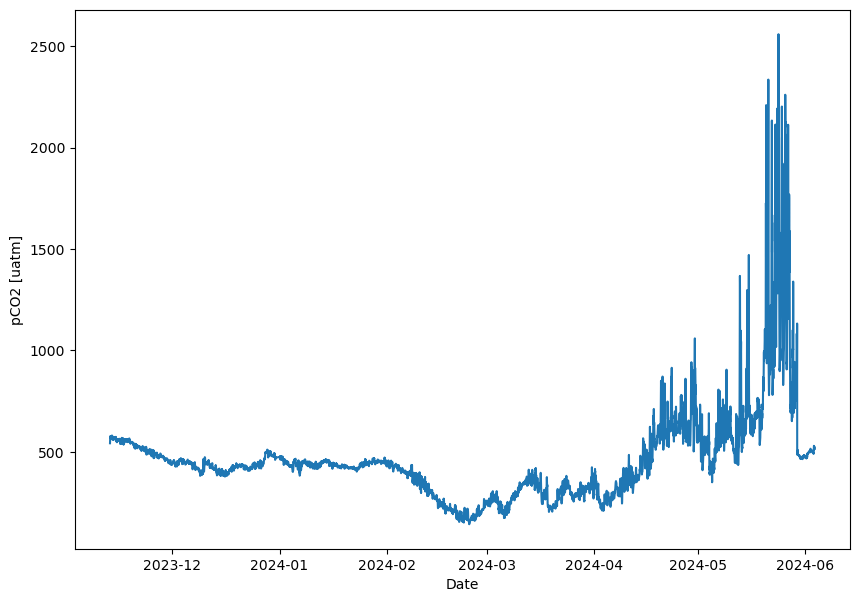

In [111]:
fig, ax = plt.subplots(figsize = [10,7])

ax.plot(df['DateTime'], df['CO2 [ppm]'], label = 'SAMICO2 245')
ax.set_xlabel('Date')
ax.set_ylabel('pCO2 [uatm]')

Here I compare our mock salinity with actual salinity. As you can see, our mock salinity is not accurate, but our actual salinity does not cover the full dataset.

Text(0, 0.5, 'Salinity [PSU]')

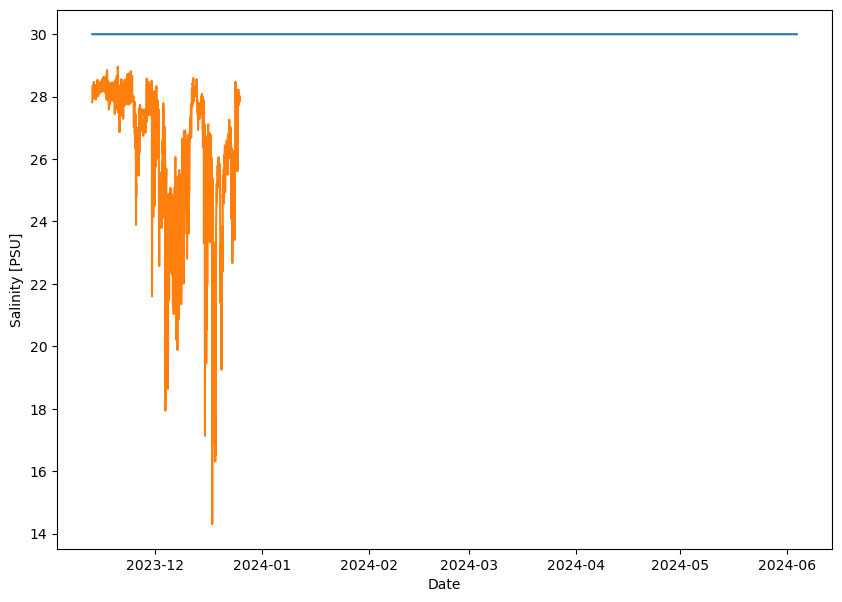

In [114]:
fig, ax = plt.subplots(figsize = [10,7])

ax.plot(df['DateTime'], df['Salinity [PSU]'], label = 'Mock Salinity')
ax.plot(DF['DateTime'], DF['hydrocatSalinity'], label = 'Actual Salinity')
ax.set_xlabel('Date')
ax.set_ylabel('Salinity [PSU]')

Text(0, 0.5, 'temperature [°C]')

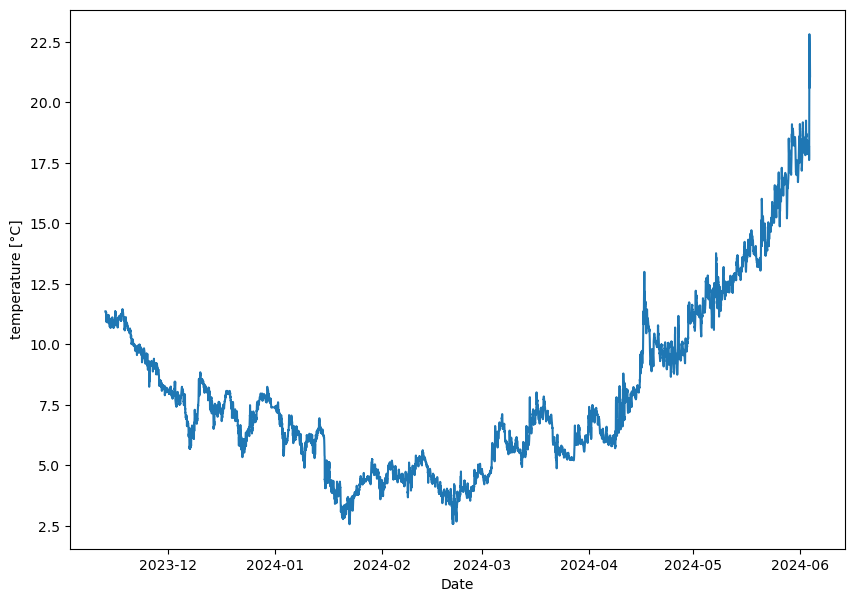

In [115]:
fig, ax = plt.subplots(figsize = [10,7])

ax.plot(df['DateTime'], df['Temperature [°C]'], label = 'Actual temperature')
ax.set_xlabel('Date')
ax.set_ylabel('temperature [°C]')

# Wind data

So our ACTUAL wind data is measured at a height of 2.4 meters above the surface. For most of calculations, we want wind at a height of 10 meters above the surface. Lucky for us, [Atlas et al. (2021)](https://journals.ametsoc.org/view/journals/bams/92/2/2010bams2946_1.xml) gives us a conversion for wind speed. I have taken the liberty of making this into a function.

In [116]:
def convert_to_U10(windspeed, Z):
    '''
    Adjust wind speed to 10m according to  Atlas et al. (2011, Bulletin of the American Meteorological Society)
    |U10| = |U| * log(10/z0)/log(z/z0)
    z0 = z * exp(-c0 + c1 * log[(ak^2u^2)/(gz)])
    z0 = z * exp(-c0 + c1 * log[(A)/(B)])
    
    Inputs:
        - windspeed: windspeed in m/s
        - z: height from which wind was measured
        
    Outputs:
        - U10 wind speed
    '''
    a = 0.032
    k = 0.4
    g = 9.81
    c0 = 3.7
    c1 = 1.165
    z = Z                                             # z (wind sensor height) based on Narr. Bay sensors
    U = windspeed
    A = a * k**2 * U **2
    B = g * z
    z0 = z * np.exp(-c0 + c1 * np.log(A/B))
    U10 = U * (np.log(10/z0) / np.log(z/z0))
    return U10

In [118]:
DF['U10'] = convert_to_U10(DF['avgWindSpeed'], 2.4)
DF

,Day Number,DateTime,CO2 [ppm],Temperature [°C],avgWindSpeed,hydrocatSalinity,U10
0,317.9412,2023-11-12 22:35:00,542.6,11.37,3.856810,27.8200,4.387079
1,317.9620,2023-11-12 23:05:00,560.6,11.33,2.804490,27.9475,3.164339
2,317.9829,2023-11-12 23:35:00,567.3,11.34,2.676930,28.0154,3.017095
3,318.0037,2023-11-13 00:05:00,571.4,11.33,2.423940,28.0926,2.725740
4,318.0245,2023-11-13 00:35:00,577.6,11.31,3.809380,28.1704,4.331677
...,...,...,...,...,...,...,...
2031,360.5037,2023-12-25 12:05:00,441.0,6.63,1.223330,28.0050,1.357056
2032,360.5245,2023-12-25 12:35:00,441.4,6.76,0.928747,27.9512,1.025513
2033,360.5454,2023-12-25 13:05:00,440.3,6.76,1.149870,27.8276,1.274192
2034,360.5662,2023-12-25 13:35:00,438.4,6.70,1.339460,27.9958,1.488289
